In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir = "PlantVillage"

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('PlantVillage')

In [4]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG'),
 WindowsPath('PlantVillage/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG'),
 WindowsPath('PlantVillage/Potato___Early_blight/009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG'),
 WindowsPath('PlantVillage/Potato___Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG'),
 WindowsPath('PlantVillage/Potato___Early_blight/0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG')]

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2152


In [6]:
early_blight = list(data_dir.glob('Potato___Early_blight/*'))
early_blight[:5]

[WindowsPath('PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG'),
 WindowsPath('PlantVillage/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG'),
 WindowsPath('PlantVillage/Potato___Early_blight/009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG'),
 WindowsPath('PlantVillage/Potato___Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG'),
 WindowsPath('PlantVillage/Potato___Early_blight/0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG')]

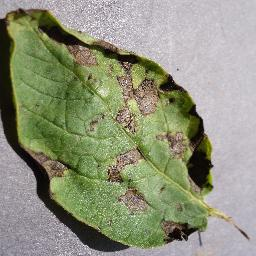

In [7]:
PIL.Image.open(str(early_blight[1]))

In [8]:
flowers_images_dict = {
    'early_blight': list(data_dir.glob('Potato___Early_blight/*')),
    'late_blight': list(data_dir.glob('Potato___Late_blight/*')),
    'healthy': list(data_dir.glob('Potato___healthy/*'))
}

In [9]:
flowers_labels_dict = {
    'early_blight': 0,
    'late_blight': 1,
    'healthy': 2
}

In [10]:
flowers_images_dict['healthy'][:5]

[WindowsPath('PlantVillage/Potato___healthy/00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG'),
 WindowsPath('PlantVillage/Potato___healthy/03da9931-e514-4cc7-b04a-8f474a133ce5___RS_HL 1830.JPG'),
 WindowsPath('PlantVillage/Potato___healthy/04481ca2-f94c-457e-b785-1ac05800b7ec___RS_HL 1930.JPG'),
 WindowsPath('PlantVillage/Potato___healthy/046641c1-f837-49eb-b5f2-4109910a027c___RS_HL 1878.JPG'),
 WindowsPath('PlantVillage/Potato___healthy/07dfb451-4378-49d1-b699-33a5fc49ff07___RS_HL 5399.JPG')]

In [11]:
img = cv2.imread(str(flowers_images_dict['healthy'][0]))

In [12]:
img.shape

(256, 256, 3)

In [13]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(256,256))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [14]:
X = np.array(X)
y = np.array(y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [17]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10) 

Epoch 1/10
51/51 [==============================] - 74s 1s/step - loss: 0.8745 - accuracy: 0.6673
Epoch 2/10
51/51 [==============================] - 62s 1s/step - loss: 0.2949 - accuracy: 0.8903
Epoch 3/10
51/51 [==============================] - 60s 1s/step - loss: 0.2118 - accuracy: 0.9362
Epoch 4/10
51/51 [==============================] - 62s 1s/step - loss: 0.1275 - accuracy: 0.9572
Epoch 5/10
51/51 [==============================] - 59s 1s/step - loss: 0.0595 - accuracy: 0.9814
Epoch 6/10
51/51 [==============================] - 58s 1s/step - loss: 0.0655 - accuracy: 0.9758
Epoch 7/10
51/51 [==============================] - 59s 1s/step - loss: 0.0305 - accuracy: 0.9888
Epoch 8/10
51/51 [==============================] - 60s 1s/step - loss: 0.0215 - accuracy: 0.9926
Epoch 9/10
51/51 [==============================] - 65s 1s/step - loss: 0.0261 - accuracy: 0.9913
Epoch 10/10
51/51 [==============================] - 64s 1s/step - loss: 0.0076 - accuracy: 0.9988


In [18]:
model.evaluate(X_test_scaled,y_test)

17/17 [==============================] - 5s 266ms/step - loss: 0.2297 - accuracy: 0.9312


[0.22970445454120636, 0.9312267899513245]

In [19]:
predictions = model.predict(X_test_scaled)
predictions

17/17 [==============================] - 5s 269ms/step


array([[  2.3335843,  10.881274 ,   4.5085597, -13.120047 , -12.430157 ],
       [ -2.338304 ,   6.9075933,  11.613069 , -12.477788 , -14.5281105],
       [ 28.182049 ,   5.721431 , -16.18578  , -14.269881 ,  -9.544008 ],
       ...,
       [ 20.053572 ,   7.321094 ,  -9.463475 , -13.833619 , -10.641485 ],
       [  0.9017864,  10.678438 ,   6.413537 , -13.150612 , -12.468391 ],
       [ -1.5167065,  13.959291 ,   5.1504073, -15.030954 , -12.763962 ]],
      dtype=float32)

In [20]:
score = tf.nn.softmax(predictions[0])

In [21]:
np.argmax(score)

1

In [22]:
y_test[0]

1

In [23]:
def predict(model, image):
    img_array = cv2.resize(image, (256, 256))
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = round(100 * (np.max(predictions[0])), 2)

    if predicted_class == 0:
        class_name = 'early_blight'
    elif predicted_class == 1:
        class_name = 'late_blight'
    else:
        class_name = 'healthy'
        
    return class_name, confidence

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
plt.axis('off')
plt.imshow(X[0])

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
num_classes = 3

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=13)  

In [ ]:
def predict(model, image):
    img_array = cv2.resize(image, (256, 256))
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = round(100 * (np.max(predictions[0])), 2)

    if predicted_class == 0:
        class_name = 'early_blight'
    elif predicted_class == 1:
        class_name = 'late_blight'
    else:
        class_name = 'healthy'
        
    return class_name, confidence